In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.__version__
#sns.set(style="ticks", color_codes=True)

In [2]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<b> Lets check the number of rows and columns
<p><b> The dataset contains 891 records of diabetes patients captured across 15 attributes!

In [3]:
titanic.shape

(891, 15)

<b> Lets have a quick look at the columns and their respective data types.

In [4]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<b> Display information about the dataset

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


<b> Lets define a function that will give us a report about the unique values of data for each attribute.

In [6]:
def show_unique_values(dataframe):
    print("Unique value for dataset attributes :\n")
    for column in dataframe.columns:
        print(column)
        print(dataframe[column].unique(), "\n")

In [7]:
show_unique_values(titanic)

Unique value for dataset attributes :

survived
[0 1] 

pclass
[3 1 2] 

sex
['male' 'female'] 

age
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ] 

sibsp
[1 0 3 4 2 5 8] 

parch
[0 1 2 5 3 4 6] 

fare
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21. 

<b> Write a function to display missing values

In [8]:
def show_missing_values(dataframe):
    missing_data = dataframe.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")

In [9]:
show_missing_values(titanic)

survived
False    891
Name: survived, dtype: int64

pclass
False    891
Name: pclass, dtype: int64

sex
False    891
Name: sex, dtype: int64

age
False    714
True     177
Name: age, dtype: int64

sibsp
False    891
Name: sibsp, dtype: int64

parch
False    891
Name: parch, dtype: int64

fare
False    891
Name: fare, dtype: int64

embarked
False    889
True       2
Name: embarked, dtype: int64

class
False    891
Name: class, dtype: int64

who
False    891
Name: who, dtype: int64

adult_male
False    891
Name: adult_male, dtype: int64

deck
True     688
False    203
Name: deck, dtype: int64

embark_town
False    889
True       2
Name: embark_town, dtype: int64

alive
False    891
Name: alive, dtype: int64

alone
False    891
Name: alone, dtype: int64



<b> Let's cross verify the above results

In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Chi-Square Test Examples

#### Example 1: Sex Vs. Survived

In [14]:
#sex_survived_crosstab = pd.crosstab(titanic['sex'], titanic['survived'], margins=True)
sex_survived_crosstab = pd.crosstab(titanic['sex'], titanic['survived'])
sex_survived_crosstab

survived,0,1
sex,,
female,81,233
male,468,109


In [12]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [15]:
def check_dependency(contingency_table):
    stat, p, dof, expected = chi2_contingency(contingency_table)
    return stat, p, dof, expected

In [16]:
# interpret test-statistic
def interpret_test_statistic(prob, dof):
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')


In [17]:
# interpret p-value
def interpret_p_value(prob, p):
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [18]:
stat, p, dof, expected = check_dependency(sex_survived_crosstab)
print("Chi-Squared Statistic = %.2f" %(stat))
print("p-value = %.3f" %p)
print('degrees of freedom = %d' % dof)

Chi-Squared Statistic = 260.72
p-value = 0.000
degrees of freedom = 1


In [19]:
np.set_printoptions(precision=3) # Round to 2 digits
expected

array([[193.475, 120.525],
       [355.525, 221.475]])

In [20]:
prob = 0.95
print("Interpreting test statistic")
print("===========================")
interpret_test_statistic(prob, dof)
print("\n\nInterpreting p-value")
print("====================")
interpret_p_value(prob, p)

Interpreting test statistic
probability=0.950, critical=3.841, stat=260.717
Dependent (reject H0)


Interpreting p-value
significance=0.050, p=0.000
Dependent (reject H0)


#### Example 2: Class Vs. Survived

In [ ]:
#class_survived_crosstab = pd.crosstab(titanic['class'], titanic['survived'], margins=True)
class_survived_crosstab = pd.crosstab(titanic['class'], titanic['survived'])
class_survived_crosstab

In [ ]:
stat, p, dof, expected = check_dependency(class_survived_crosstab)
print("Chi-Squared Statistic = %.2f" %(stat))
print("p-value = %.3f" %p)
print('degrees of freedom = %d' % dof)

In [ ]:
prob = 0.95
print("Interpreting test statistic")
print("===========================")
interpret_test_statistic(prob, dof)
print("\n\nInterpreting p-value")
print("====================")
interpret_p_value(prob, p)

### Now, the Feature Selection Process using Sklearn's SelectKBest

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [24]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [25]:
titanic['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [26]:
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
titanic['embarked'].isna().sum()

2

In [28]:
# Drop rows having NaN/NaT values in 'embarked' column
titanic = titanic.dropna(subset=['embarked'])

In [29]:
titanic.shape

(889, 15)

In [30]:
# replace sex categories with numbers
titanic['sex'].replace(['male', 'female'], [1, 0], inplace=True)

# Convert strings to numbers
# titanic.sex[titanic.sex == 'male'] = 1
# titanic.sex[titanic.sex == 'female'] = 0

In [31]:
# replacing who with numbers
titanic['who'].replace(['man', 'woman', 'child'], [1, 0, 2], inplace=True)

In [ ]:
# titanic.who[titanic.who == 'man'] = 1
# titanic.who[titanic.who == 'woman'] = 0
# titanic.who[titanic.who == 'child'] = 2

In [32]:
# replace embarked categories to numbers
titanic['embarked'].replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [ ]:
# titanic.embarked[titanic.embarked == 'S'] = 1
# titanic.embarked[titanic.embarked == 'C'] = 2
# titanic.embarked[titanic.embarked == 'Q'] = 3

In [33]:
titanic['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']

In [34]:
# replacing values
titanic['class'].replace(['First', 'Second', 'Third'], [1, 2, 3], inplace=True)

In [35]:
#Select the categorical predictor variables
X = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male','alone']]
y = titanic[['survived']]

In [36]:
X.head()

,pclass,sex,sibsp,parch,embarked,class,who,adult_male,alone
0,3,1,1,0,1,3,1,True,False
1,1,0,1,0,2,1,0,False,False
2,3,0,0,0,1,3,0,False,True
3,1,0,1,0,1,1,0,False,False
4,3,1,0,0,1,3,1,True,True


In [37]:
X.dtypes

pclass        int64
sex           int64
sibsp         int64
parch         int64
embarked      int64
class         int64
who           int64
adult_male     bool
alone          bool
dtype: object

In [38]:
X.shape

(889, 9)

In [39]:
y.shape

(889, 1)

In [47]:
chi_square_selector = SelectKBest(score_func=chi2, k=4)
fit = chi_square_selector.fit(X, y)
np.set_printoptions(precision=8) # Round to 2 digits
np.set_printoptions(suppress=True) #Suppress scientific notation

In [48]:
fit.scores_
#print(type(fit.scores_))

array([ 30.13526611,  91.51403687,   2.39118845,  10.44859797,
         3.11536003,  30.13526611,  41.35495864, 108.62823217,
        15.0525113 ])

In [42]:
fit.get_support()

array([False,  True, False, False, False,  True,  True,  True, False])

In [43]:
selected_features = fit.transform(X)
# Display the shape of the selected features array
print(selected_features.shape)

(889, 4)


In [44]:
selected_features

array([[1, 3, 1, True],
       [0, 1, 0, False],
       [0, 3, 0, False],
       ...,
       [0, 3, 0, False],
       [1, 1, 1, True],
       [1, 3, 1, True]], dtype=object)

In [ ]:
X_new = SelectKBest(chi2, k=4).fit_transform(X,y)
X_new

### Data Discretization (fare column)

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')

<p>Let's set the fare categories as High, Medium, and Low
<p>But the dataset has actual prices present in it. So lets go ahead and apply this tranformation using the binning technique.

In [49]:
#Fare range is between 512.3292 & 0.0

print("max", max(titanic["fare"]))
print("min", min(titanic["fare"]))

max 512.3292
min 0.0


<AxesSubplot:>

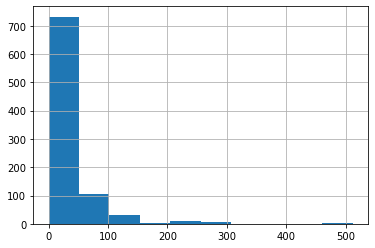

In [50]:
titanic["fare"].hist()

In [ ]:
fig, ax = plt.subplots()
titanic["fare"].hist(color='#A9C5D3', edgecolor='black', grid=False, bins=10)
ax.set_title('Histogram of Fare', fontsize=12)
ax.set_xlabel('Fare', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [51]:
fare_groups = ['fare1','fare2','fare3','fare4','fare5','fare6','fare7','fare8','fare9','fare10']
titanic['fare_binned'] = pd.cut(titanic['fare'], 10, labels=fare_groups)
titanic[['fare','fare_binned']].head(10)

,fare,fare_binned
0,7.2500,fare1
1,71.2833,fare2
2,7.9250,fare1
3,53.1000,fare2
4,8.0500,fare1
5,8.4583,fare1
6,51.8625,fare2
7,21.0750,fare1
8,11.1333,fare1
9,30.0708,fare1


In [52]:
fare_survived_crosstab = pd.crosstab(titanic['fare_binned'], titanic['survived'])
fare_survived_crosstab

survived,0,1
fare_binned,,
fare1,499,233
fare2,36,68
fare3,8,23
fare4,0,2
fare5,4,7
fare6,2,4
fare10,0,3


In [53]:
stat, p, dof, expected = check_dependency(fare_survived_crosstab)
print("Chi-Squared Statistic = %.2f" %(stat))
print("p-value = %.3f" %p)
print('degrees of freedom = %d' % dof)

Chi-Squared Statistic = 75.28
p-value = 0.000
degrees of freedom = 6
